In [32]:
# kernel r_env_cnvs
library(tidyr)
library(viridis)
library(ggplot2)
library(dplyr)

# Example QC plot

# Stacked bar plot - Comparison across LncRNA databases

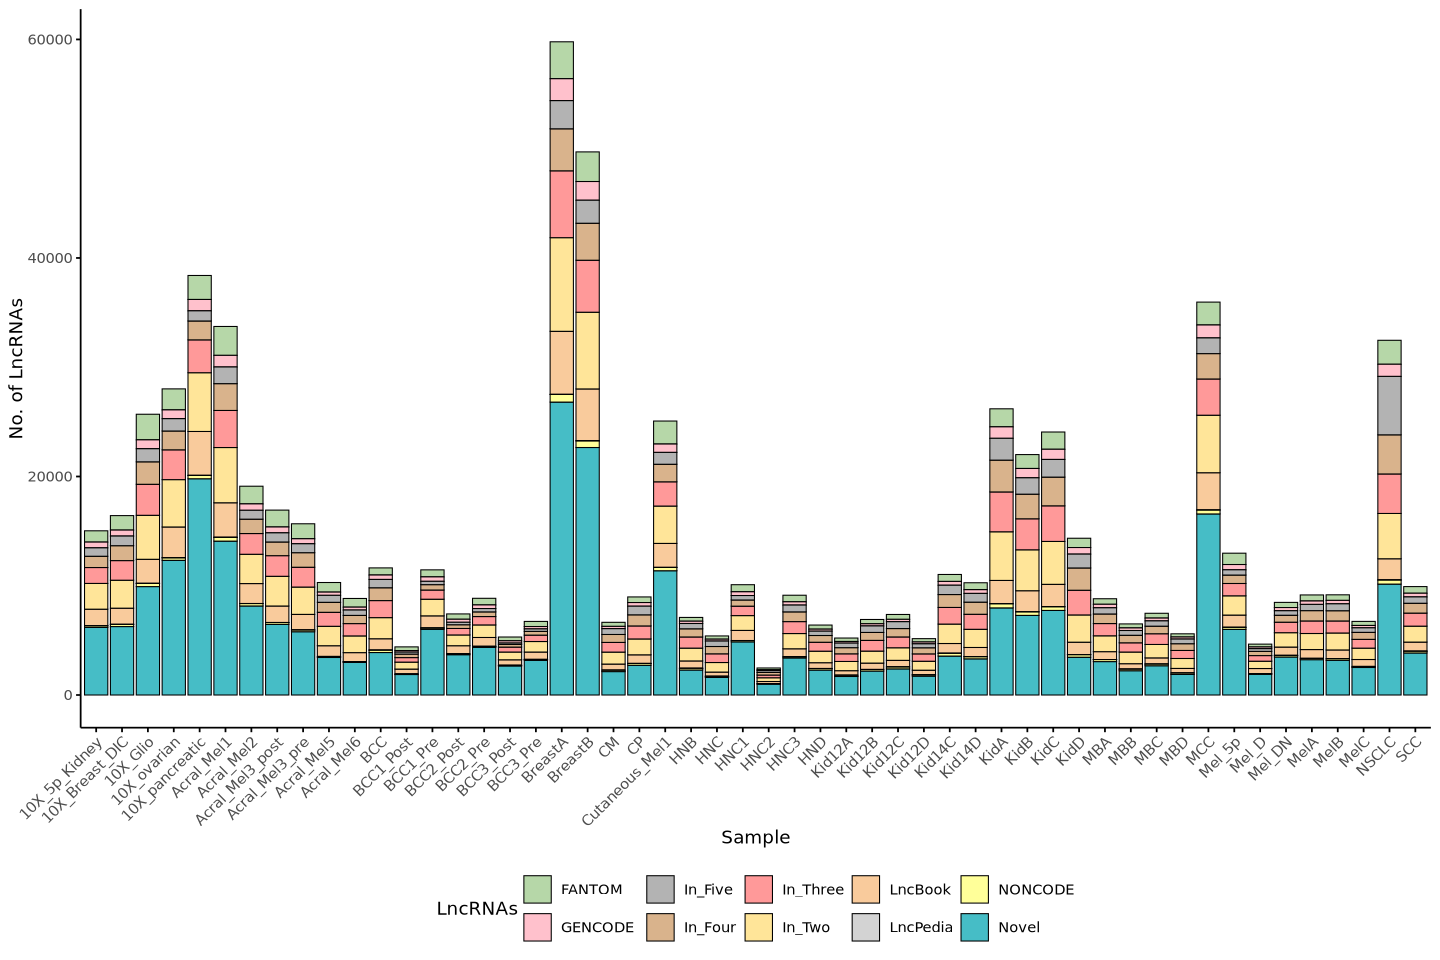

In [33]:
########################  Fig1 barplot ############################ in R
# data obtained after running sbatch stacked_bar_overlap_grok.sh at /QRISdata/Q4386/lnc_revision/fig1

data<-read.csv("/QRISdata/Q4386/lnc_revision/fig1/overlap_summary_grok.tsv", sep="\t", header=TRUE)
d<-pivot_longer(
  data = data,
  cols = -Sample,
  names_to = "LncRNAs",
  values_to = "No. of lncRNAs"
)
d$Sample <- factor(d$Sample,levels=unique(d$Sample))
#hex codes google colors:  https://spreadsheet.dev/how-to-get-the-hexadecimal-codes-of-colors-in-google-sheets
options(repr.plot.height = 8, repr.plot.width = 12)

custom_colors <- c("Novel" = "#46bdc6", "LncBook" = "#f9cb9c", "FANTOM" = "#b6d7a8",
            "GENCODE" = "#ffc1cc", "NONCODE" = "#ffff99", "In_Two" = "#ffe599",
            "In_Three" = "#ff9999", "In_Four" = "#d9b38c", "In_Five" = "#b3b3b3",
            "LncPedia" = "#d3d3d3")

d$Sample<-gsub(".bed","",d$Sample)
p<-ggplot(d, aes(x = Sample, y = `No. of lncRNAs`, fill = LncRNAs)) +
  geom_bar(stat = "identity", position = "stack", color = "black", linewidth=0.3) +
  scale_fill_manual(values = custom_colors) +  # Set custom colors here
  theme_bw() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(color = "black"),
    axis.ticks = element_line(color = "black"),
    panel.border = element_blank(),
    panel.background = element_blank(),
    legend.position = "bottom"
  ) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ylab("No. of LncRNAs")

p

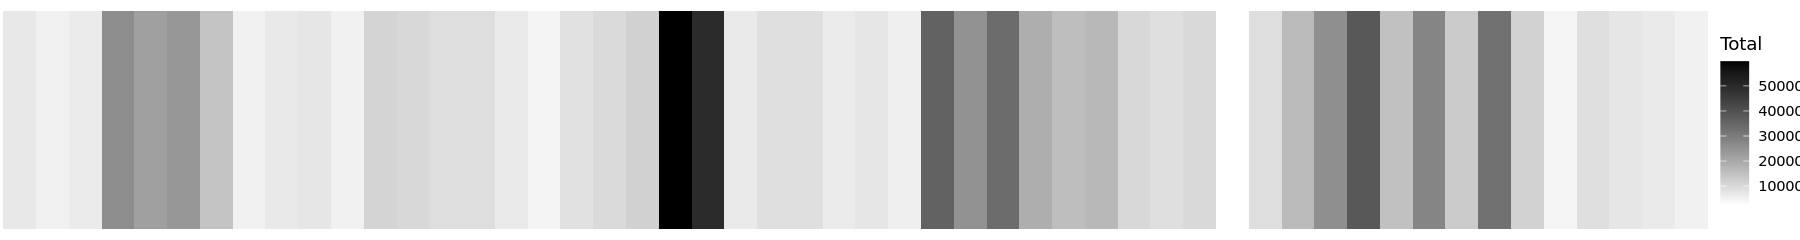

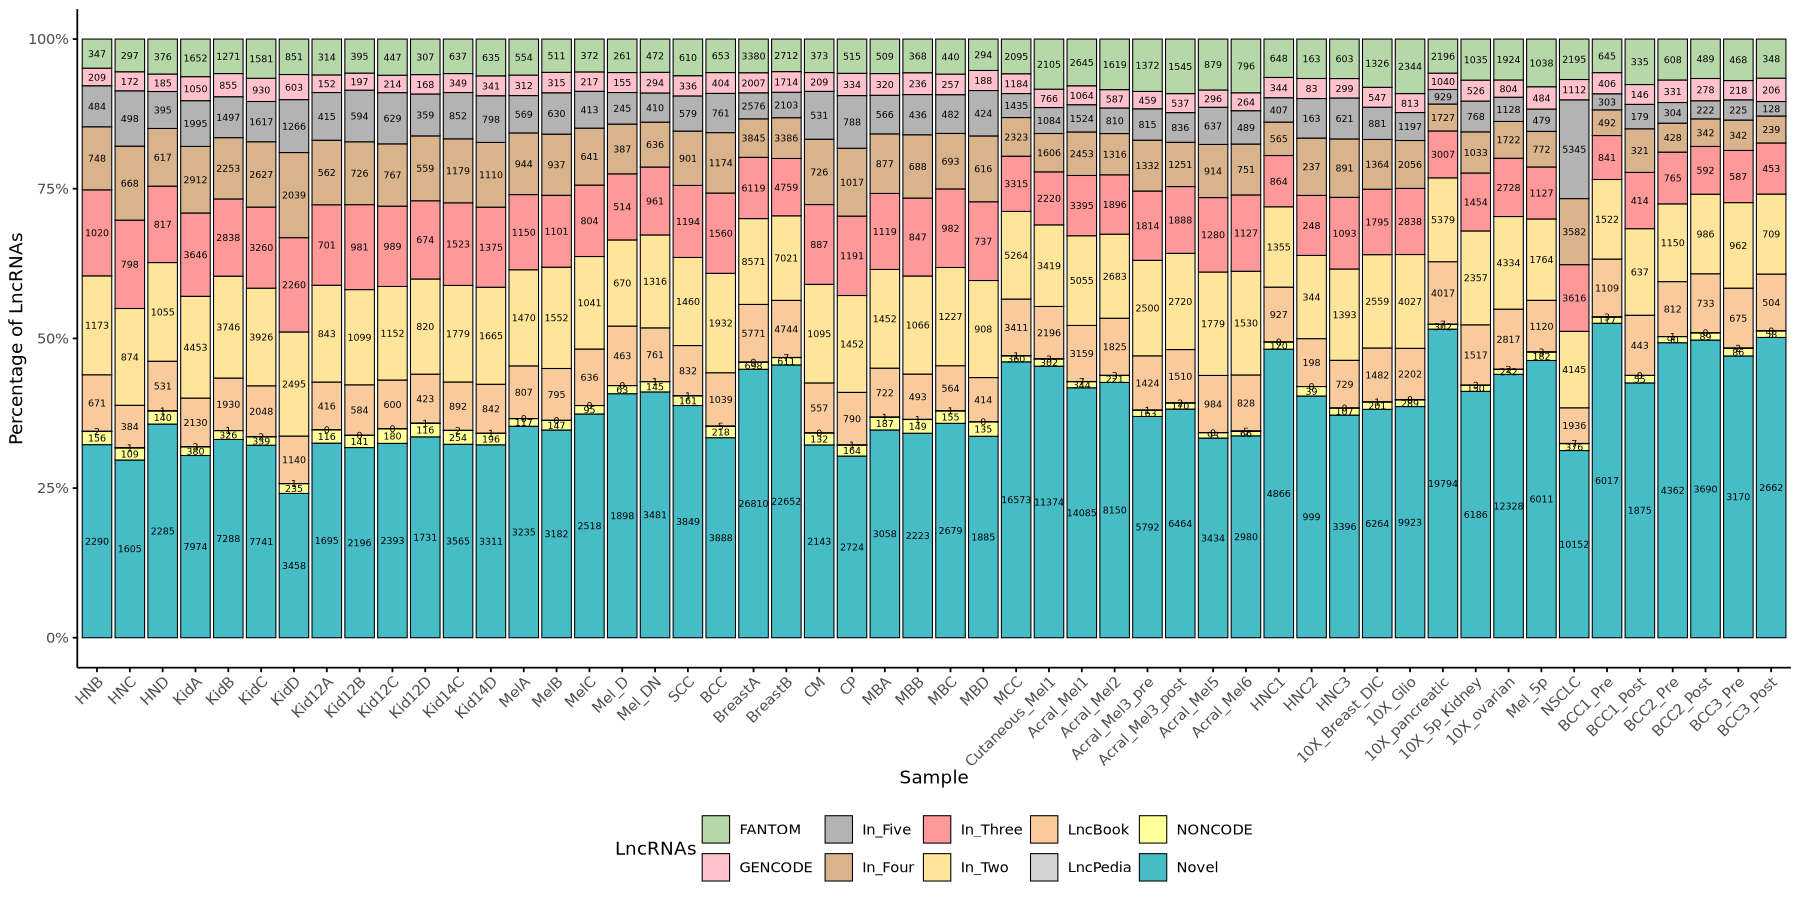

In [34]:
sample_order<-c('HNB','HNC','HND',
                'KidA','KidB','KidC','KidD','Kid12A','Kid12B','Kid12C','Kid12D','Kid14C','Kid14D',
                'MelA','MelB','MelC','Mel_D','Mel_DN',
                'SCC','BCC',
                'BreastA','BreastB','CM','CP',
                'MBA','MBB','MBC','MBD',
                'MCC','Cutaneous_Mel1','Acral_Mel1','Acral_Mel2','Acral_Mel3_pre','Acral_Mel3_post','Acral_Mel5','Acral_Mel6',
                'HNC1','HNC2','HNC3',
                '10X_Breast_DIC','10X_Glio','10X_pancreatic','10X_5p_Kidney','10X_ovarian','Mel_5p','NSCLC',
                'BCC1_Pre','BCC1_Post','BCC2_Pre','BCC2_Post','BCC3_Pre','BCC3_Post'
                )


## Percentage stacked bar

data<-read.csv("/QRISdata/Q4386/lnc_revision/fig1/overlap_summary_grok.tsv", sep="\t", header=TRUE)
# Pivot the data to long format
d <- pivot_longer(
  data = data,
  cols = -Sample,
  names_to = "LncRNAs",
  values_to = "No_of_lncRNAs"
)

d$Sample<-gsub(".bed","",d$Sample)
# Factor the Sample column to maintain the order
d$Sample <- factor(d$Sample, levels = sample_order)#unique(d$Sample))

#d <- d[order(d$Sample), ]  

# Calculate the total number of lncRNAs per Sample
d_totals <- d %>%
  group_by(Sample) %>%
  summarise(Total = sum(No_of_lncRNAs))
# Merge the totals with the original data
d <- merge(d, d_totals, by = "Sample")

# Define custom colors
#custom_colors <- c("Novel" = "#46bdc6", "LncBook" = "#f9cb9c", "FANTOM" = "#b6d7a8","GENCODE"="pink","NONCODE"="yellow","In_Two" = "#ffe599",
#                  "In_Three"="red","In_Four"="brown","In_Five"="black", "LncPedia"="grey")

custom_colors <- c("Novel" = "#46bdc6", "LncBook" = "#f9cb9c", "FANTOM" = "#b6d7a8",
            "GENCODE" = "#ffc1cc", "NONCODE" = "#ffff99", "In_Two" = "#ffe599",
            "In_Three" = "#ff9999", "In_Four" = "#d9b38c", "In_Five" = "#b3b3b3",
            "LncPedia" = "#d3d3d3")

# Create the percentage stacked bar plot
p_perc <- ggplot(d, aes(x = Sample, y = No_of_lncRNAs / Total * 100, fill = LncRNAs)) +
  geom_bar(stat = "identity", position = "stack", color = "black", linewidth = 0.3) +
  geom_text(aes(label = No_of_lncRNAs), position = position_stack(vjust = 0.5), size = 2) + #angle = 90,
  scale_fill_manual(values = custom_colors) +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  theme_bw() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(color = "black"),
    axis.ticks = element_line(color = "black"),
    panel.border = element_blank(),
    panel.background = element_blank(),
    legend.position = "bottom"
  ) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ylab("Percentage of LncRNAs")
#ggsave("stats_barplot_percentage_600dpi.png", plot = p_perc, width = 8.3, height = 5, units = "in", dpi = 600)


data$Total <- data$Novel + data$FANTOM + data$LncBook + data$NONCODE + data$GENCODE + data$LncPedia + data$In_Two + data$In_Three + data$In_Four + data$In_Five
color_bar_df <- d[, c("Sample", "Total")]
color_bar_plot <- ggplot(color_bar_df, aes(x = Sample, y = 1, fill = Total)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "black") +
  theme_void()

# Extract the grob of the color bar plot
color_bar_grob <- ggplotGrob(color_bar_plot)
#ggsave("stats_barplot_color_bar_top_600dpi.png", plot = p_perc, width = 8.3, height = 5, units = "in", dpi = 600)



options(repr.plot.height = 2, repr.plot.width = 15)
color_bar_plot
options(repr.plot.height = 7.5, repr.plot.width = 15)
p_perc

In [ ]:
pdf("/scratch/project/stseq/Prakrithi/lnc_revision/plots/stacked_bar_counts.pdf",height = 2,width = 15)
color_bar_plot
dev.off()
pdf("/scratch/project/stseq/Prakrithi/lnc_revision/plots/stacked_bar.pdf",height = 7.5,width = 15)
p_perc
dev.off()

# Relative counts

Warning message:
“Removed 5731 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5731 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


pdf 
  2

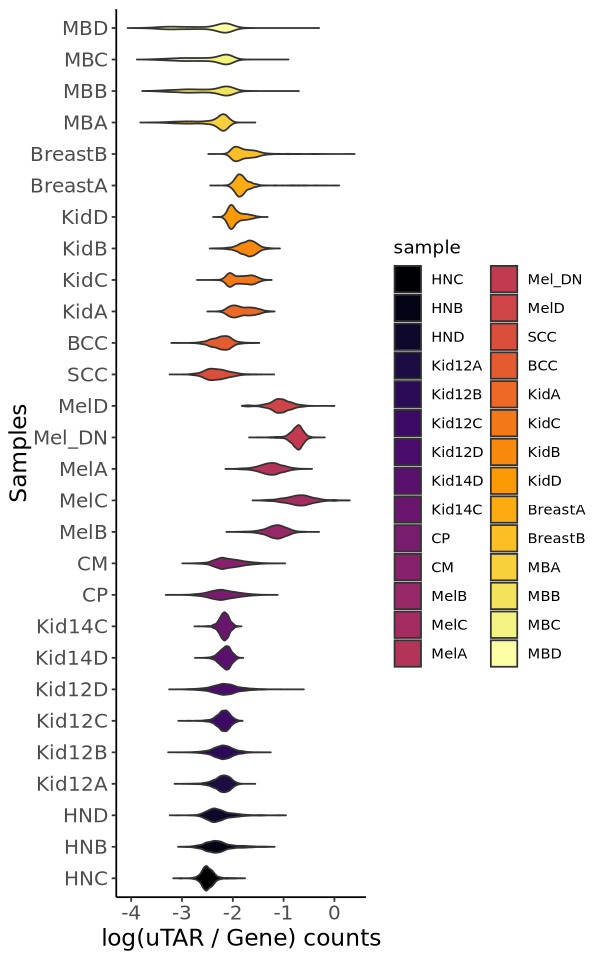

In [13]:
library(ggplot2)
library(viridis)
v<-read.csv("lnc_revision/counts/gene_utar_ratio.txt", sep="\t", header=TRUE)
options(repr.plot.height = 8, repr.plot.width = 5)
v$sample<-gsub("Mel_D","MelD",v$sample)
v$sample<-gsub("MelDN","Mel_DN",v$sample)
v$sample <- factor(v$sample,levels=c("KidA",
                                     "KidB",
                                     "KidC",
                                     "KidD",
                                     "Kid12A",
                                     "Kid12B",
                                     "Kid12C",
                                     "Kid12D",
                                     "Kid14C",
                                     "Kid14D",
                                     "HNB",
                                     "HNC",
                                     "HND",
                                     "MelA",
                                     "MelB",
                                     "MelC",
                                     "Mel_DN",
                                     "MelD",
                                     "SCC",
                                     "BCC",
                                     "BreastA",
                                     "BreastB",
                                     "CP",
                                     "CM",
                                     "MBA",
                                     "MBB",
                                     "MBC",
                                     "MBD"))                   
v$sample <- factor(v$sample,levels=unique(v$sample))

p<-ggplot(v, aes(
  y = as.factor(sample), 
  x = log10(utar_sum / gene_sum), 
  fill = sample
)) +
  geom_violin() +
  theme_classic() +
  xlab("log(uTAR / Gene) counts") +
  ylab("Samples") +
  scale_fill_manual(values = inferno(length(unique(v$sample)))) +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14)
  )
p

pdf("Relative_counts.pdf", width=5, height=8)
p
dev.off()

In [14]:
getwd()

[1] "/scratch/project_mnt/S0010/Prakrithi"

In [11]:
unique(v$sample)

[1] HNC     HNB     HND     Kid12A  Kid12B  Kid12C  Kid12D  Kid14D  Kid14C 
[10] CP      CM      MelB    MelC    MelA    <NA>    MelD    SCC     BCC    
[19] KidA    KidC    KidB    KidD    BreastA BreastB MBA     MBB     MBC    
[28] MBD    
27 Levels: HNC HNB HND Kid12A Kid12B Kid12C Kid12D Kid14D Kid14C CP CM ... MBD


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




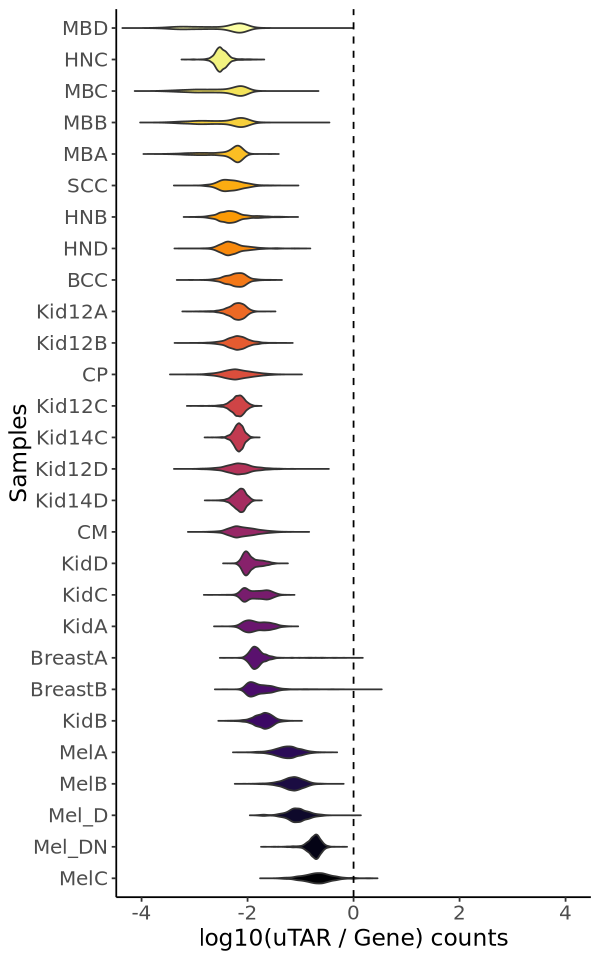

In [9]:
library(ggplot2)
library(viridis)
library(dplyr)

# 1. Load your data
v <- read.csv("lnc_revision/counts/gene_utar_ratio.txt", sep = "\t", header = TRUE)

# 2. Filter out rows where gene_sum or utar_sum is zero or missing to avoid division issues
v_filtered <- v %>%
  filter(!is.na(gene_sum), !is.na(utar_sum)) %>%
  filter(gene_sum > 0, utar_sum > 0)

# 3. Compute log10(utar_sum / gene_sum)
v_filtered <- v_filtered %>%
  mutate(log_ratio = log10(utar_sum / gene_sum))

# 4. Order samples by decreasing mean log_ratio
sample_order <- v_filtered %>%
  group_by(sample) %>%
  summarise(mean_log_ratio = mean(log_ratio, na.rm = TRUE)) %>%
  arrange(desc(mean_log_ratio)) %>%
  pull(sample)

v_filtered$sample <- factor(v_filtered$sample, levels = sample_order)

# 5. Determine symmetric x-axis limits for centering around zero
xmax <- max(abs(v_filtered$log_ratio), na.rm = TRUE)

# 6. Plot violin plots
ggplot(v_filtered, aes(
  y = sample,
  x = log_ratio,
  fill = sample
)) +
  geom_violin(trim = FALSE) +
  geom_vline(xintercept = 0, linetype = "dashed", color = "black") +
  scale_fill_manual(values = inferno(length(unique(v_filtered$sample)))) +
  coord_cartesian(xlim = c(-xmax, xmax)) +
  theme_classic() +
  labs(
    x = "log10(uTAR / Gene) counts",
    y = "Samples"
  ) +
  theme(
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.position = "none"
  )


In [ ]:
v$sample <- factor(v$sample,levels=c("KidA",
                                     "KidB",
                                     "KidC",
                                     "KidD",
                                     "Kid12A",
                                     "Kid12B",
                                     "Kid12C",
                                     "Kid12D",
                                     "Kid14C",
                                     "Kid14D",
                                     "HNB",
                                     "HNC",
                                     "HND",
                                     "MelA",
                                     "MelB",
                                     "MelC",
                                     "Mel_DN",
                                     "MelD",
                                     "SCC",
                                     "BCC",
                                     "BreastA",
                                     "BreastB",
                                     "CP",
                                     "CM",
                                     "MBA",
                                     "MBB",
                                     "MBC",
                                     "MBD"))                   
v$sample <- factor(v$sample,levels=unique(v$sample))